# Whatsapp Chat Analysis

In [1]:
# Importing libraries
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter
from pprint import pprint
%matplotlib inline

<IPython.core.display.Javascript object>

## Data Preprocessing

In [2]:
with open('WhatsApp Chat with School of AI Amritsar.txt','r') as file:
    x = file.read()

In [3]:
# pprint(x)

In [4]:
def rawToDf(file):
    with open(file, 'r') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split('\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s', raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall('\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s', raw_string) # finds all the date-time patterns

        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df

    # converting date-time pattern which is of type String to type datetime, format is to be specified for the whole string where the placeholders are extracted by the method    
    try:
        df['date_time'] = pd.to_datetime(df['date_time'], format='%m/%d/%y, %I:%M %p - ') #10/20/19, 10:24 pm - 
    except:
        df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%Y, %I:%M %p - ') #20/10/2019, 10:24 pm -

    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)

    return df

In [5]:
df = rawToDf('Group Chat.txt')

In [6]:
# pprint(df['user'].value_counts())
# Abc is the most active person

In [7]:
me = "Satyam Bhalla"

In [8]:
df.shape # no. of msgs

(1201, 3)

## No. of Images, group notifications and dropping them

In [9]:
images = df[df['msg']=="<Media omitted> "] #no. of images, images are represented by <media omitted>
notifications = df[df['user']=='grp_notif']

In [10]:
print(images.shape)
print(notifications.shape)

(43, 3)
(202, 3)


In [11]:
df.drop(images.index, inplace=True) #removing images
df.drop(notifications.index, inplace=True) #removing grp_notif

In [12]:
df.reset_index(inplace=True, drop=True)
df.shape

(956, 3)

## Who is the most active member of the group. Who is the least active. Is it same on weekday weekend?

In [13]:
# pprint(df.groupby("user")["msg"].count().sort_values(ascending=False))

In [14]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name()) # can use day_name or weekday from datetime 

In [15]:
df.weekday.value_counts(sort=True)

Saturday     317
Friday       212
Tuesday      145
Sunday        97
Wednesday     84
Thursday      70
Monday        31
Name: weekday, dtype: int64

In [16]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

In [17]:
print(df['is_weekend'].value_counts())

False    542
True     414
Name: is_weekend, dtype: int64


In [18]:
user_list = list(df["user"].unique())

In [19]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for user in user_list:
    for idx, row in df.iterrows():
        if row["user"] == user:
            emojis_found = r.findall(row["msg"])
            for emoji_found in emojis_found:
                emoji_ctr[emoji_found] += 1
    for item in emoji_ctr.most_common(5):
#         print(user,item[0] + " - " + str(item[1]))
        print(item[0] + " - " + str(item[1]))
    print('*'*10,"Next User",'*'*10)

😂 - 7
🏻 - 3
😇 - 2
🍪 - 2
✋ - 2
********** Next User **********
😂 - 13
♂ - 4
😅 - 3
🏻 - 3
🙇 - 3
********** Next User **********
😂 - 13
♂ - 4
😅 - 3
🏻 - 3
🙇 - 3
********** Next User **********
😂 - 13
🏻 - 5
♂ - 4
🙂 - 4
🙄 - 3
********** Next User **********
😂 - 13
🏻 - 5
♂ - 4
🙂 - 4
🙄 - 3
********** Next User **********
😂 - 13
🏻 - 5
♂ - 4
🙂 - 4
🙄 - 3
********** Next User **********
😂 - 14
🏻 - 9
😅 - 6
👍 - 5
♂ - 4
********** Next User **********
😂 - 14
🏻 - 9
😅 - 6
👍 - 5
♂ - 4
********** Next User **********
😂 - 14
🏻 - 9
😅 - 6
👍 - 5
♂ - 4
********** Next User **********
😂 - 14
🏻 - 11
😅 - 6
👍 - 5
✋ - 5
********** Next User **********
😂 - 14
🏻 - 13
😅 - 7
👍 - 7
✋ - 5
********** Next User **********
😂 - 14
🏻 - 13
😅 - 7
👍 - 7
✋ - 5
********** Next User **********
😂 - 14
🏻 - 13
😅 - 7
👍 - 7
✋ - 5
********** Next User **********
🏻 - 17
😂 - 14
👍 - 8
😅 - 7
✋ - 5
********** Next User **********
🏻 - 17
😂 - 14
🙏 - 10
👍 - 9
😅 - 7
********** Next User **********
🏻 - 17
😂 - 16
🙏 - 10
👍 - 9
😅 - 7
********** Next 

## What can my activity say about my sleep cycle?

In [20]:
def to_hour(val):
    return val.hour

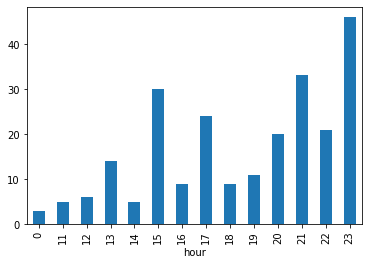

In [21]:
df['hour'] = df['date_time'].apply(to_hour)
df[df['user']==me].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

## What is the difference in Weekend vs Weekday usage pattern?
## How many words do I type on average on weekday vs weekend?

In [22]:
msgs_per_user = df['user'].value_counts(sort=True)
# pprint(msgs_per_user)

In [23]:
top5_users = msgs_per_user.index.tolist()[:5]
# pprint(top5_users)

In [24]:
df_top5 = df.copy()
df_top5 = df_top5[df_top5.user.isin(top5_users)]
# pprint(df_top5.head())

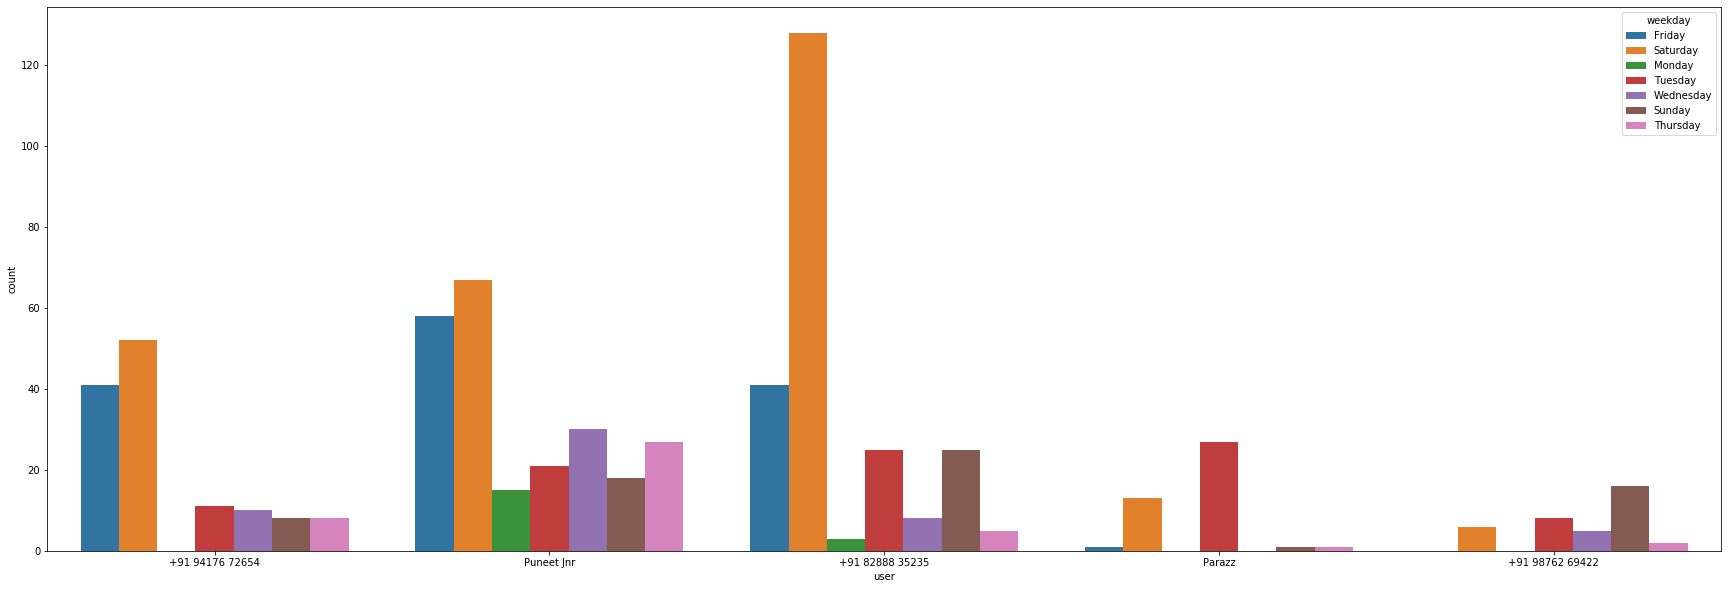

In [25]:
plt.figure(figsize=(30,10))
sns.countplot(x="user", hue="weekday", data=df_top5)

In [26]:
df_top5['is_weekend'] = df_top5.weekday.isin(['Sunday', 'Saturday'])

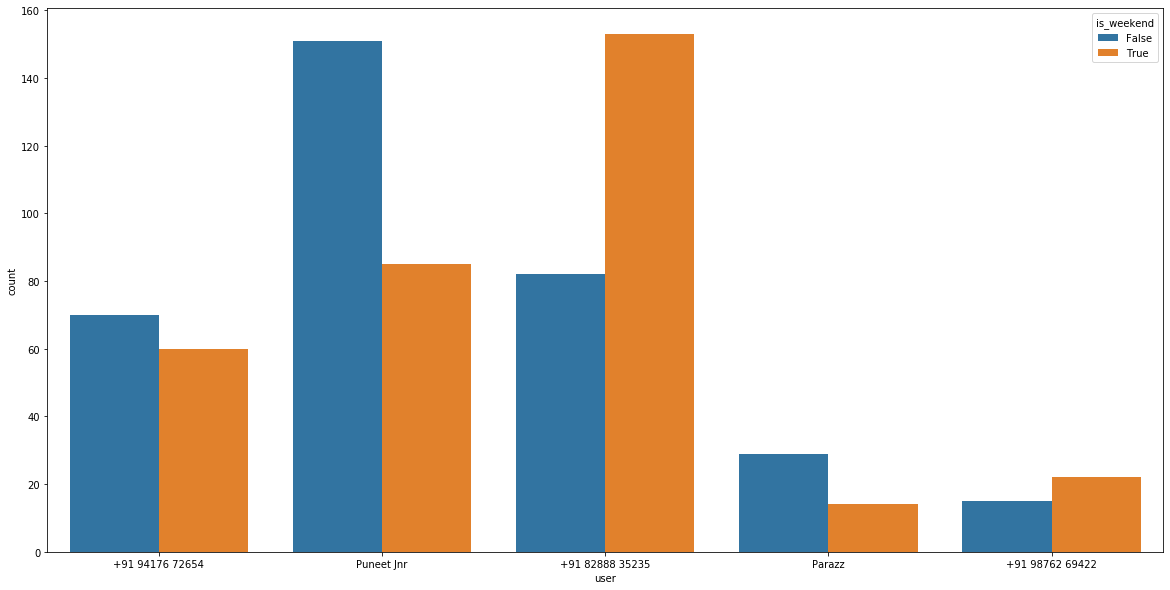

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(x="user", hue="is_weekend", data=df_top5)

In [28]:
def word_count(val):
    return len(val.split())

In [29]:
df['no_of_words'] = df['msg'].apply(word_count)

In [30]:
df_top5['no_of_words'] = df_top5['msg'].apply(word_count)

In [31]:
total_words_weekday = df[df['is_weekend']==False]['no_of_words'].sum()
total_words_weekday

4929

In [32]:
total_words_weekend = df[df['is_weekend']]['no_of_words'].sum()
total_words_weekend

3593

In [33]:
total_words_weekday/5

985.8

In [34]:
total_words_weekend/2

1796.5

In [35]:
# pprint(df.groupby('user')['no_of_words'].sum().sort_values(ascending=False))

In [36]:
# pprint(df.groupby('user')['no_of_words'].sum()/df.groupby('user').size()).sort_values(ascending=False)

In [37]:
# ppirnt(df_top5.groupby('user')['no_of_words'].sum()/df_top5.groupby('user').size()).sort_values(ascending=False)

In [38]:
wordPerMsg_weekday_vs_weekend = (df_top5.groupby(['user', 'is_weekend'])['no_of_words'].sum()/df_top5.groupby(['user', 'is_weekend']).size())
# pprint(wordPerMsg_weekday_vs_weekend)

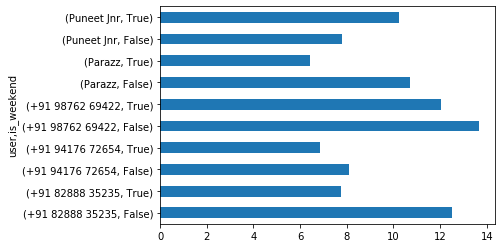

In [39]:
wordPerMsg_weekday_vs_weekend.plot(kind='barh')

## Most Usage - Time of Day

In [40]:
x = df.groupby(['hour', 'weekday'])['msg'].size().reset_index()
x2 = x.pivot("hour", 'weekday', 'msg')
x2.head()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,NaN,NaN,7.0,2.0,NaN,1.0,3.0
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN


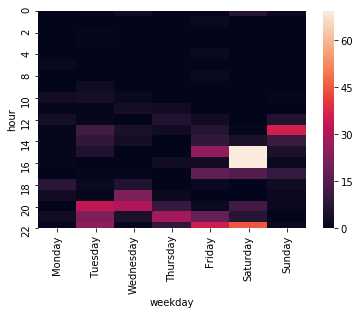

In [41]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.heatmap(x2[days].fillna(0), robust=True)

## Which are the most common words?

In [42]:
my_msgs_index = np.array(df[df['user']==me].index)
print(my_msgs_index, my_msgs_index.shape)

[  1   3   6  13  19  20  46  61  66  67  70  74  75  76  92 105 107 109
 117 118 124 126 130 151 153 196 200 201 205 207 230 231 232 234 235 248
 249 252 254 260 262 267 268 270 272 273 274 276 277 282 285 287 289 294
 297 299 303 304 305 306 307 310 311 312 316 317 318 378 379 381 383 384
 392 394 399 400 402 405 408 409 410 411 412 415 416 417 418 419 420 421
 423 424 425 426 427 428 429 433 434 435 437 438 439 453 454 455 456 457
 458 459 460 461 465 467 468 469 470 471 476 477 478 482 483 484 490 492
 493 494 495 498 501 502 521 546 548 554 555 557 559 561 562 564 575 579
 580 582 583 584 586 587 591 592 595 597 598 599 601 607 609 610 611 614
 617 618 622 629 631 633 634 635 660 662 664 665 667 669 679 682 683 684
 685 686 690 692 693 698 699 730 734 741 754 756 758 766 771 772 775 777
 779 782 785 786 790 791 794 796 797 815 820 847 849 853 854 858 860 861
 862 863 865 867 871 874 875 878 881 882 883 889 890 925 930 933 939 940
 945 946] (236,)


In [43]:
prev_msgs_index = my_msgs_index - 1
print(prev_msgs_index, prev_msgs_index.shape)

[  0   2   5  12  18  19  45  60  65  66  69  73  74  75  91 104 106 108
 116 117 123 125 129 150 152 195 199 200 204 206 229 230 231 233 234 247
 248 251 253 259 261 266 267 269 271 272 273 275 276 281 284 286 288 293
 296 298 302 303 304 305 306 309 310 311 315 316 317 377 378 380 382 383
 391 393 398 399 401 404 407 408 409 410 411 414 415 416 417 418 419 420
 422 423 424 425 426 427 428 432 433 434 436 437 438 452 453 454 455 456
 457 458 459 460 464 466 467 468 469 470 475 476 477 481 482 483 489 491
 492 493 494 497 500 501 520 545 547 553 554 556 558 560 561 563 574 578
 579 581 582 583 585 586 590 591 594 596 597 598 600 606 608 609 610 613
 616 617 621 628 630 632 633 634 659 661 663 664 666 668 678 681 682 683
 684 685 689 691 692 697 698 729 733 740 753 755 757 765 770 771 774 776
 778 781 784 785 789 790 793 795 796 814 819 846 848 852 853 857 859 860
 861 862 864 866 870 873 874 877 880 881 882 888 889 924 929 932 938 939
 944 945] (236,)


In [44]:
comment_words = ' '
stopwords = STOPWORDS.update(['lo', 'ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'okay', 'ok', 'will'])
  
for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

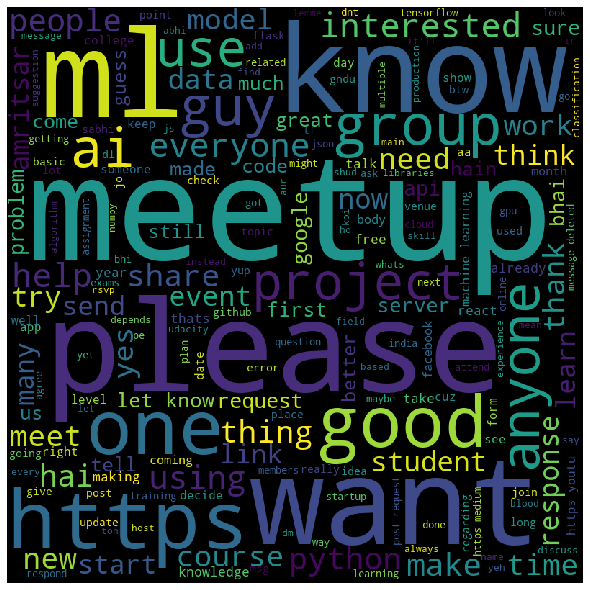

In [45]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

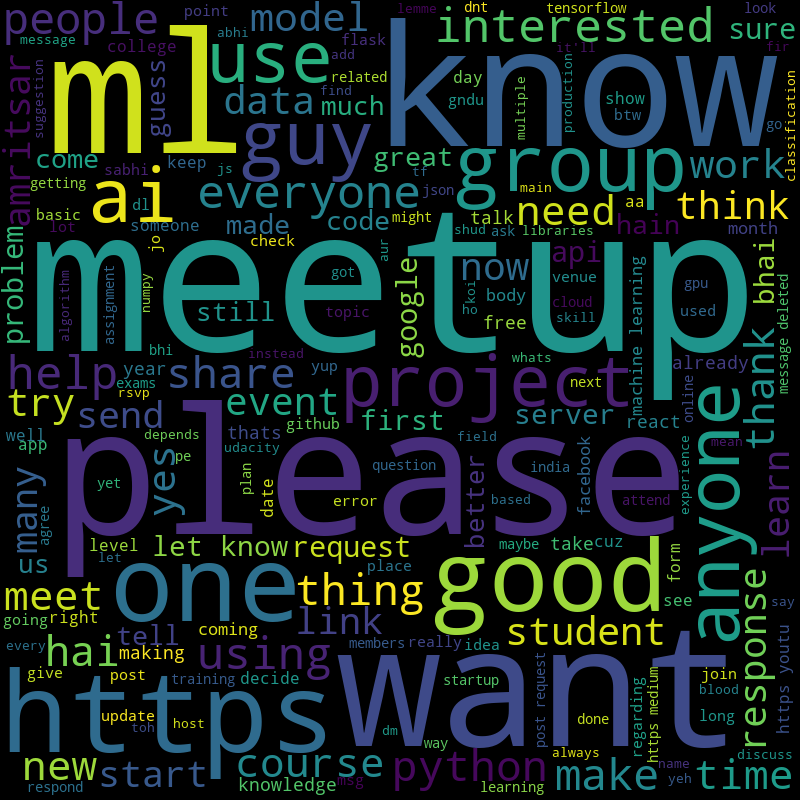

In [46]:
wordcloud.to_image()

## In any group, do I have any inclination towards responding to someone?

In [47]:
my_msgs_index = np.array(df[df['user']==me].index)
print(my_msgs_index, my_msgs_index.shape)

[  1   3   6  13  19  20  46  61  66  67  70  74  75  76  92 105 107 109
 117 118 124 126 130 151 153 196 200 201 205 207 230 231 232 234 235 248
 249 252 254 260 262 267 268 270 272 273 274 276 277 282 285 287 289 294
 297 299 303 304 305 306 307 310 311 312 316 317 318 378 379 381 383 384
 392 394 399 400 402 405 408 409 410 411 412 415 416 417 418 419 420 421
 423 424 425 426 427 428 429 433 434 435 437 438 439 453 454 455 456 457
 458 459 460 461 465 467 468 469 470 471 476 477 478 482 483 484 490 492
 493 494 495 498 501 502 521 546 548 554 555 557 559 561 562 564 575 579
 580 582 583 584 586 587 591 592 595 597 598 599 601 607 609 610 611 614
 617 618 622 629 631 633 634 635 660 662 664 665 667 669 679 682 683 684
 685 686 690 692 693 698 699 730 734 741 754 756 758 766 771 772 775 777
 779 782 785 786 790 791 794 796 797 815 820 847 849 853 854 858 860 861
 862 863 865 867 871 874 875 878 881 882 883 889 890 925 930 933 939 940
 945 946] (236,)


In [48]:
prev_msgs_index = my_msgs_index - 1
print(prev_msgs_index, prev_msgs_index.shape)

[  0   2   5  12  18  19  45  60  65  66  69  73  74  75  91 104 106 108
 116 117 123 125 129 150 152 195 199 200 204 206 229 230 231 233 234 247
 248 251 253 259 261 266 267 269 271 272 273 275 276 281 284 286 288 293
 296 298 302 303 304 305 306 309 310 311 315 316 317 377 378 380 382 383
 391 393 398 399 401 404 407 408 409 410 411 414 415 416 417 418 419 420
 422 423 424 425 426 427 428 432 433 434 436 437 438 452 453 454 455 456
 457 458 459 460 464 466 467 468 469 470 475 476 477 481 482 483 489 491
 492 493 494 497 500 501 520 545 547 553 554 556 558 560 561 563 574 578
 579 581 582 583 585 586 590 591 594 596 597 598 600 606 608 609 610 613
 616 617 621 628 630 632 633 634 659 661 663 664 666 668 678 681 682 683
 684 685 689 691 692 697 698 729 733 740 753 755 757 765 770 771 774 776
 778 781 784 785 789 790 793 795 796 814 819 846 848 852 853 857 859 860
 861 862 864 866 870 873 874 877 880 881 882 888 889 924 929 932 938 939
 944 945] (236,)


In [49]:
prev_msgs_index = np.delete(prev_msgs_index, 0)
prev_msgs_index

array([  2,   5,  12,  18,  19,  45,  60,  65,  66,  69,  73,  74,  75,
        91, 104, 106, 108, 116, 117, 123, 125, 129, 150, 152, 195, 199,
       200, 204, 206, 229, 230, 231, 233, 234, 247, 248, 251, 253, 259,
       261, 266, 267, 269, 271, 272, 273, 275, 276, 281, 284, 286, 288,
       293, 296, 298, 302, 303, 304, 305, 306, 309, 310, 311, 315, 316,
       317, 377, 378, 380, 382, 383, 391, 393, 398, 399, 401, 404, 407,
       408, 409, 410, 411, 414, 415, 416, 417, 418, 419, 420, 422, 423,
       424, 425, 426, 427, 428, 432, 433, 434, 436, 437, 438, 452, 453,
       454, 455, 456, 457, 458, 459, 460, 464, 466, 467, 468, 469, 470,
       475, 476, 477, 481, 482, 483, 489, 491, 492, 493, 494, 497, 500,
       501, 520, 545, 547, 553, 554, 556, 558, 560, 561, 563, 574, 578,
       579, 581, 582, 583, 585, 586, 590, 591, 594, 596, 597, 598, 600,
       606, 608, 609, 610, 613, 616, 617, 621, 628, 630, 632, 633, 634,
       659, 661, 663, 664, 666, 668, 678, 681, 682, 683, 684, 68

In [50]:
df_replies = df.iloc[prev_msgs_index].copy()
df_replies.shape

(235, 7)

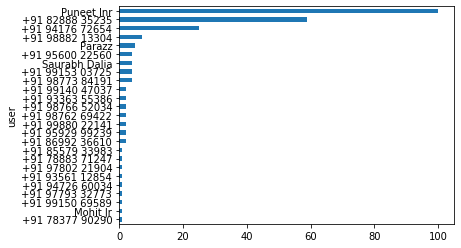

In [51]:
df_replies.groupby(["user"])["msg"].size().sort_values().plot(kind='barh')

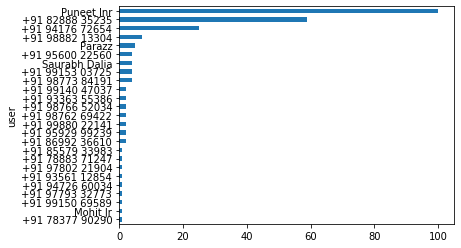

In [52]:
df_replies.groupby(["user"])["msg"].size().sort_values().plot(kind='barh')